# Doctor Type ML Pre-processing
Amy Jin

June 18th, 2018

Our goal of this project is to predict doctors/NPI type with their records. 

# 0 What is Machine Learning? 


***"Field of study that gives computers the ability to learn without being explicitly programmed” (Arthur Samuel, 1959)***

Example: self-driving

* Traditional programming: hard coding
* Machine learning: learning based on training data

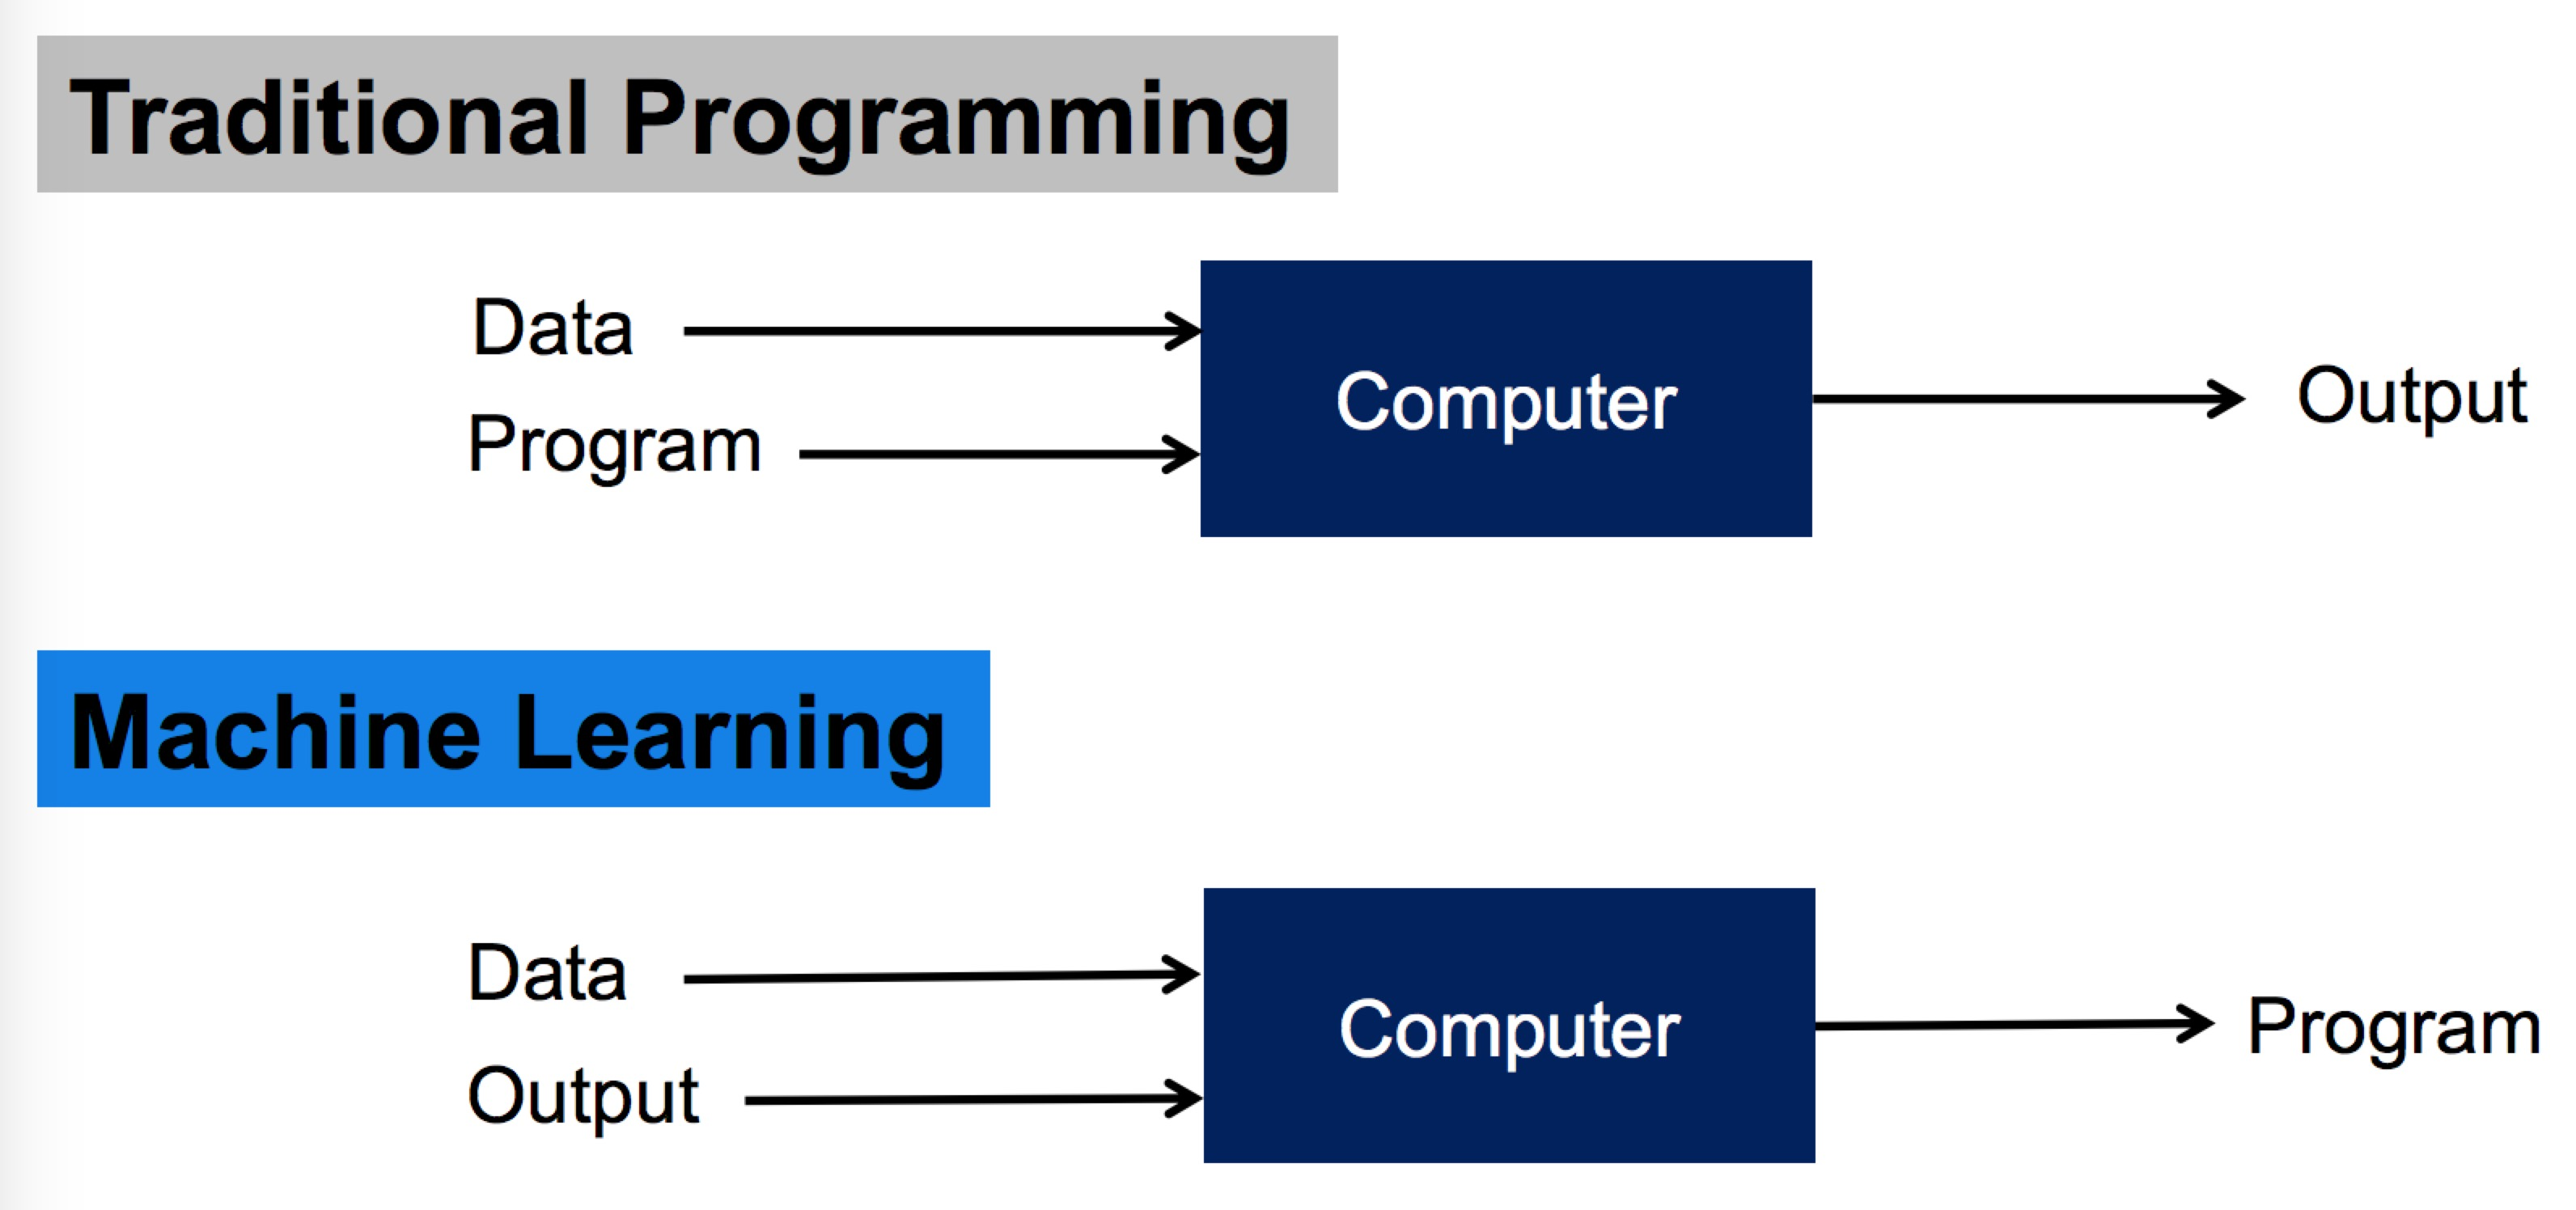

In [10]:
from IPython.display import Image
Image(filename='ML.jpg',width=600, height=600)

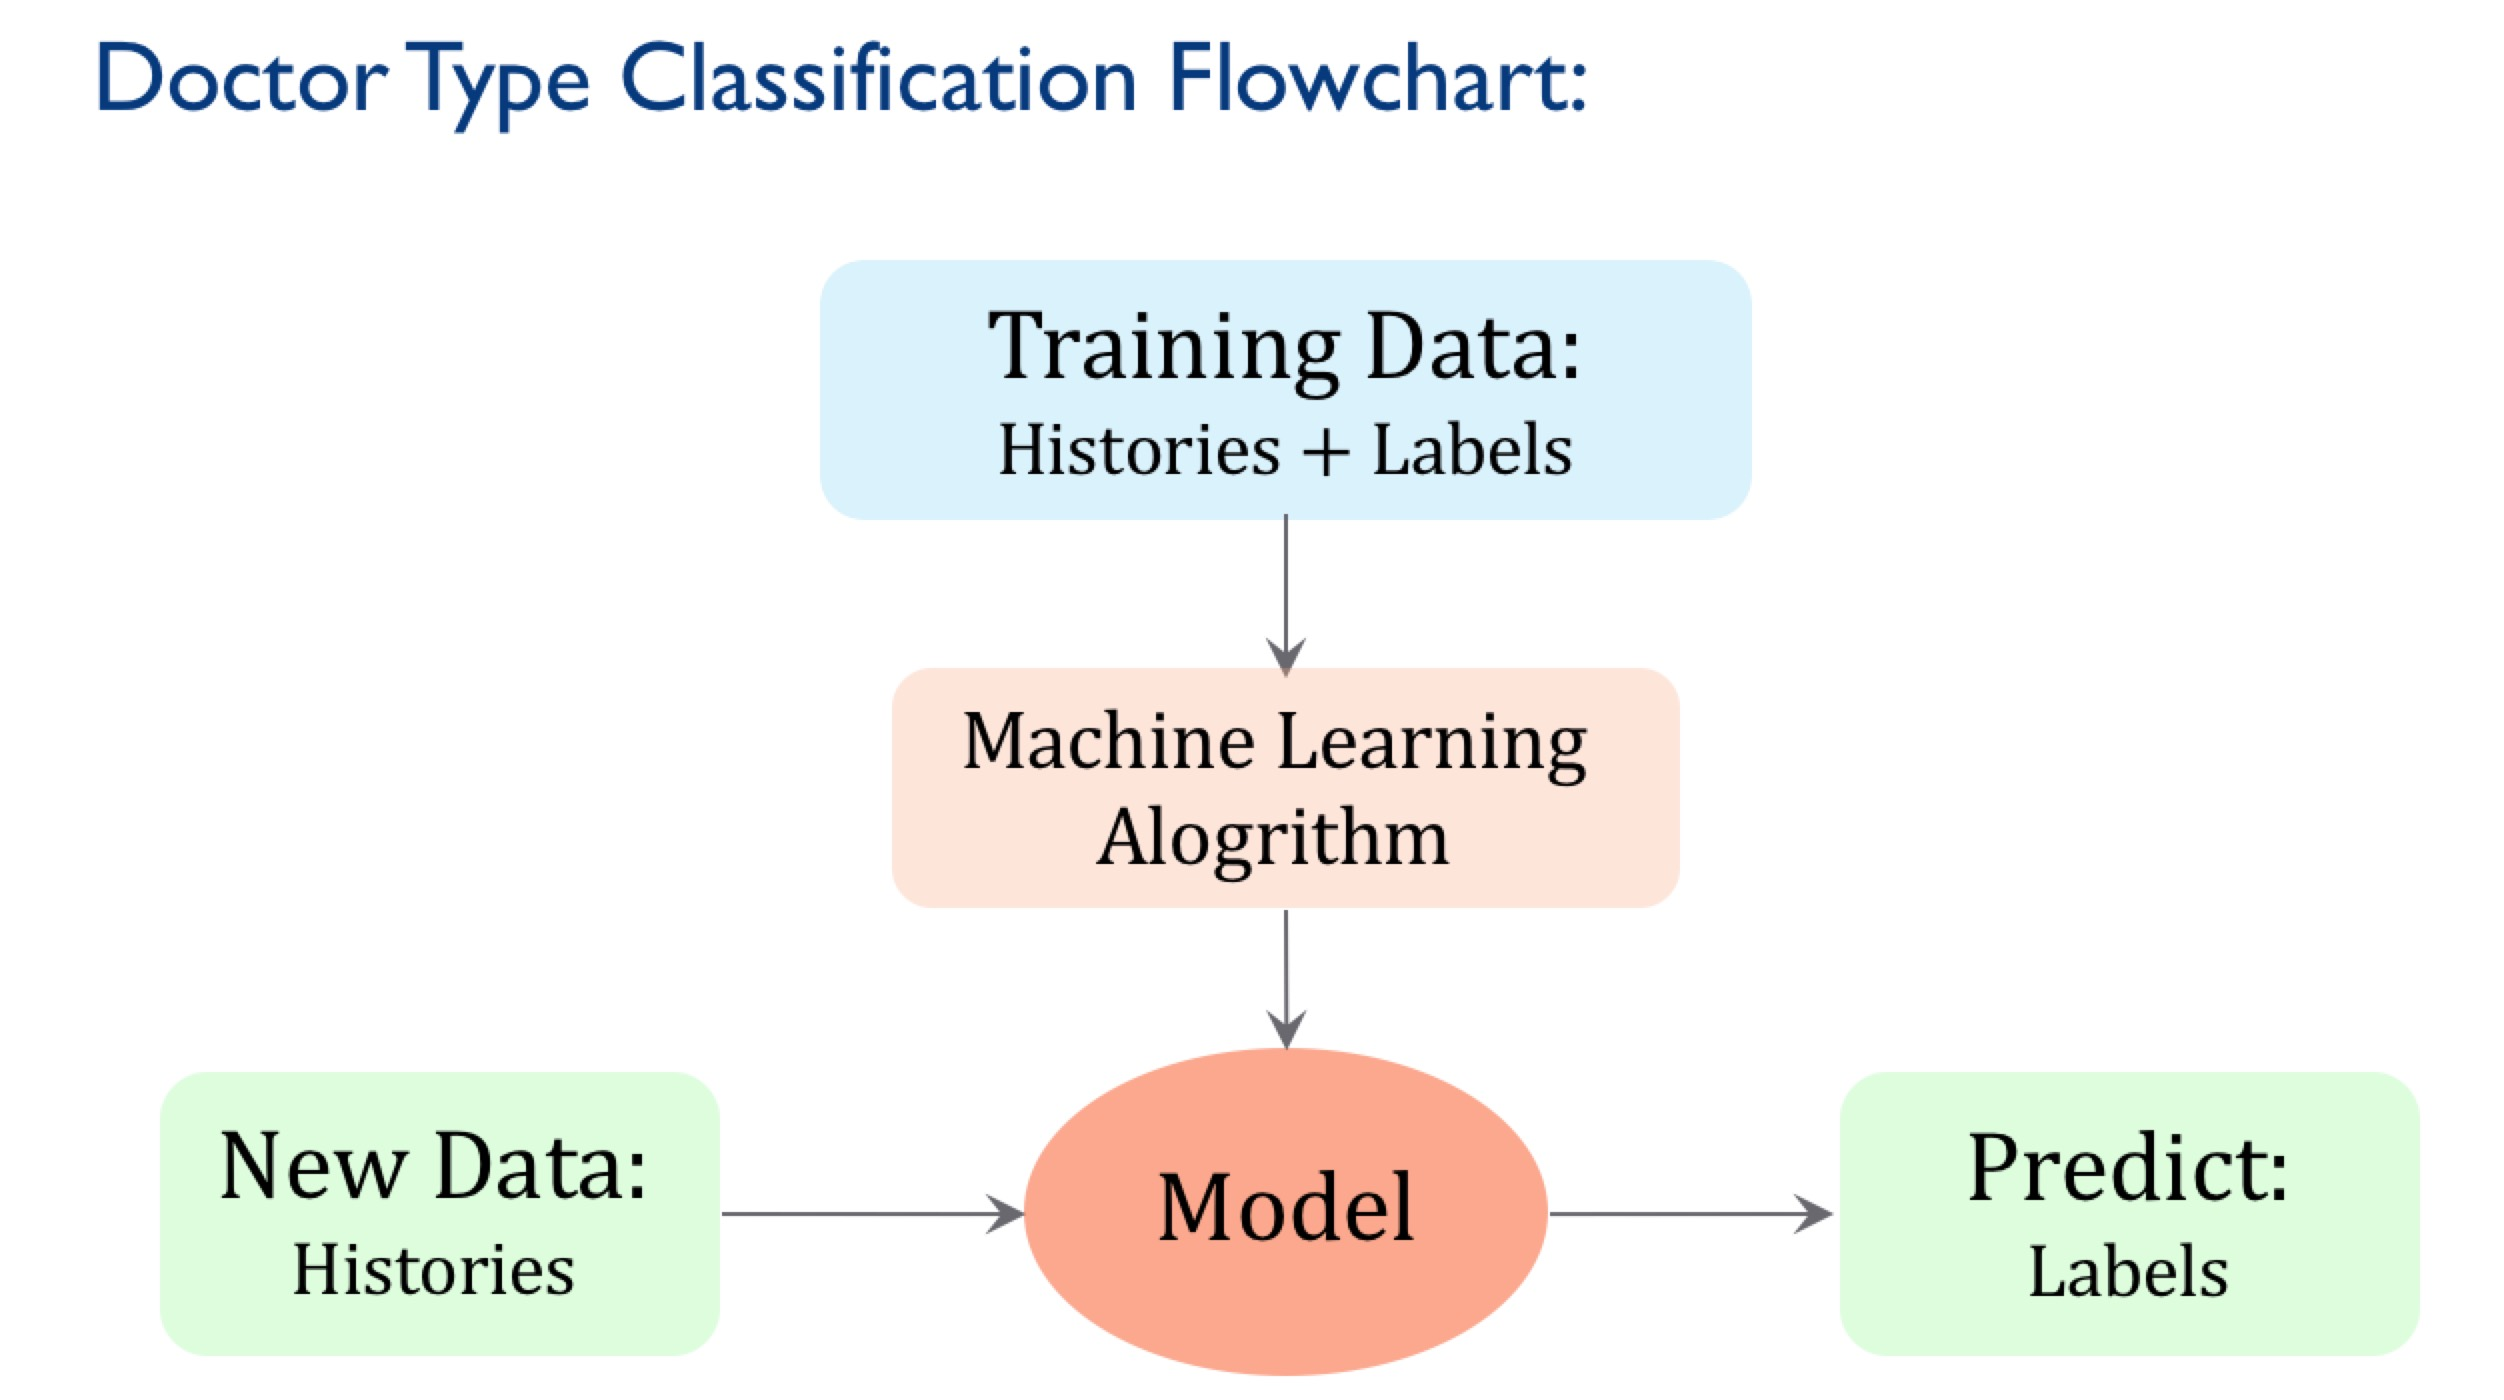

In [7]:
from IPython.display import Image
Image(filename='ML_flowchart.jpg',width=600, height=600)

# What can we get from the ML project? 

### 1) Data Driven Discoviers ($D^3$)
    - How does features (doctors' histories) look like? What's their distributions? 
    - Is there any correlation among features?
    - Any pattern in the dataset? 
    - Any feature might be influential to prediction? 
    - What features can determine doctor type? and how?
    
### 2) Doctor Type Prediction
    - What is his/her doctor type? Is he/she oncologist or not?

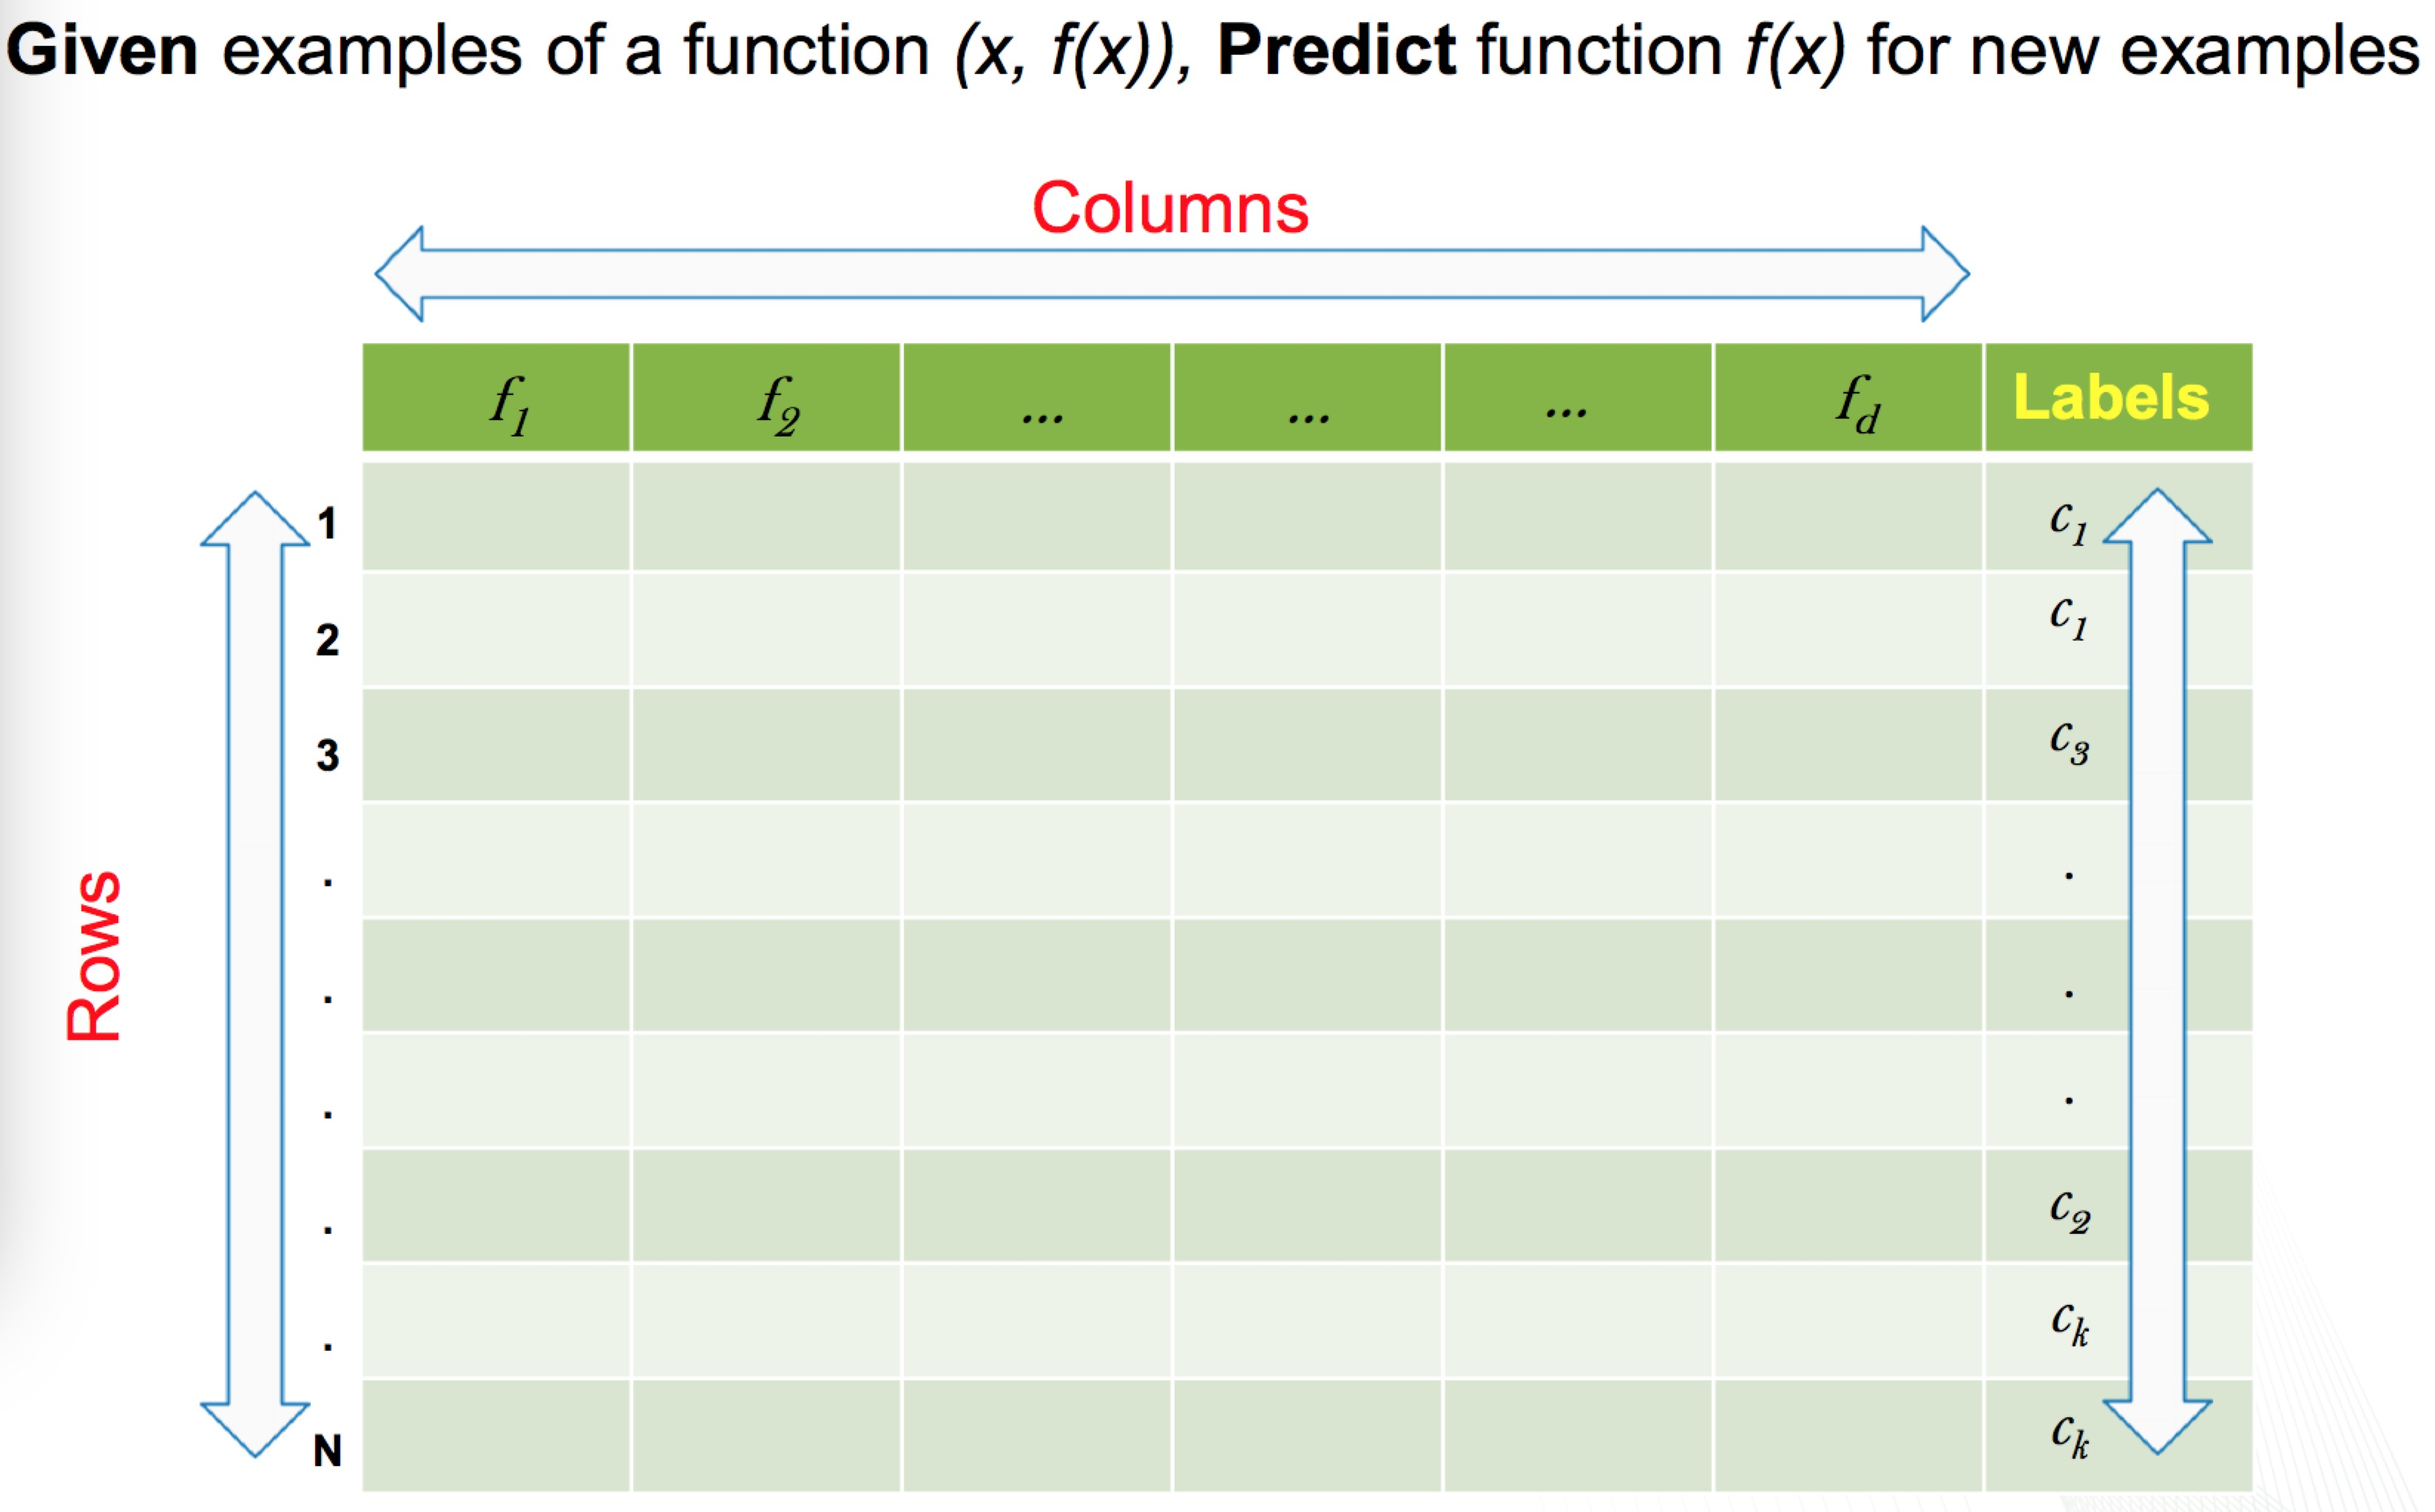

In [1]:
from IPython.display import Image
Image(filename='ml_table.jpg',width=600, height=600)

# 1 Load CSV and Install Packages

Import libraries and check libaries versions.

In [12]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy as np
print('numpy: {}'.format(np.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 2.7.15 |Anaconda custom (64-bit)| (default, May  1 2018, 18:37:05) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
scipy: 1.1.0
numpy: 1.14.3
matplotlib: 2.2.2
pandas: 0.23.0
sklearn: 0.19.1


In [13]:
# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Load dataset. The dataset is located *munge_ml_provider_type.final_table* in the parenthood server.

In [14]:
data = pd.read_csv("/Users/yuejin/Documents/AmyJin_2018/Work/Test/2018_03/Doctor_Type_ML/final_table2.csv")

In [15]:
data.head(5)

,npi,Y_is_oncologist,Certification,patient_count,X_96413,X_96367,X_96361,X_80053,X_G0008,X_83615,X_82728,X_83550,X_J3490,X_Q2037
0,1003000134,0,Dermatopathology,4686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1003000407,0,Family Medicine/OMT,493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1003000480,0,Surgery,147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1003000597,0,Urology,95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1003000639,0,Thoracic and Cardiac Surgery,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data['Y_is_oncologist'] = data['Y_is_oncologist'].astype('category')

In [6]:
# check missing values in data
data.isnull().sum()

npi                0
Y_is_oncologist    0
Certification      0
patient_count      0
X_96413            0
X_96367            0
X_96361            0
X_80053            0
X_G0008            0
X_83615            0
X_82728            0
X_83550            0
X_J3490            0
X_Q2037            0
dtype: int64

# 2 Split Data into Train and Test Sets
Separating data into training and testing sets is an important part of evaluating data mining models. Typically, when you separate a data set into a training set and testing set, most of the data is used for training, and a smaller portion of the data is used for testing. Analysis Services randomly samples the data to help ensure that the testing and training sets are similar. By using similar data for training and testing, you can minimize the effects of data discrepancies and better understand the characteristics of the model.

We will split the loaded dataset into two, 80% of which we will use to train and validate our models and 20% that we will hold back as a test dataset.

In [8]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2)

In [7]:
print train.shape[0]
print test.shape[0]

148794
37199


# 3 Summarize Dataset
Now it is time to take a look at the data. In this step we are going to take a look at the data a few different ways:

* Dimensions of the dataset.
* Types of the attributes.
* Peek at the data itself.
* Levels of the class attribute.
* Breakdown of the instances in each class.
* Statistical summary of all attributes.

## 3.1 Dimensions of Dataset

We can get a quick idea of how many instances (rows) and how many features (columns) the data contains with the dim function.

In [8]:
print train.shape

(148794, 14)


In [9]:
list(train)

['npi',
 'Y_is_oncologist',
 'Certification',
 'patient_count',
 'X_96413',
 'X_96367',
 'X_96361',
 'X_80053',
 'X_G0008',
 'X_83615',
 'X_82728',
 'X_83550',
 'X_J3490',
 'X_Q2037']

Therea are 148795 instances and 10 features (X) and 1 predictor (Y).

## 3.2 Types of Attributes
It is a good idea to get an idea of the types of the attributes. They could be doubles, integers, strings, factors and other types.

Knowing the types is important as it will give you an idea of how to better summarize the data you have and the types of transforms you might need to use to prepare the data before you model it. Let’s see the summary of the data.

In [10]:
print train.dtypes

npi                   int64
Y_is_oncologist    category
Certification        object
patient_count         int64
X_96413             float64
X_96367             float64
X_96361             float64
X_80053             float64
X_G0008             float64
X_83615             float64
X_82728             float64
X_83550             float64
X_J3490             float64
X_Q2037             float64
dtype: object


## 3.3 Peek at the Data
It is also always a good idea to actually eyeball your data. The first 5 rows of the data are given:

In [11]:
train.head()

,npi,Y_is_oncologist,Certification,patient_count,X_96413,X_96367,X_96361,X_80053,X_G0008,X_83615,X_82728,X_83550,X_J3490,X_Q2037
63423,1346208824,0,Emergency Medicine,282,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
52670,1285634840,0,Internal Medicine,443,0.0,0.0,0.0,0.803612,0.388262,0.0,0.0,0.0,0.0,0.0
101160,1548242951,0,Diagnostic Radiology,3402,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
22014,1114970563,0,Ophthalmology,207,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
47992,1255491445,0,Diagnostic Radiology,2724,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


## 3.4 Levels of the Doctor Type
The class variable is a factor. A factor is a class that has multiple class labels or levels. Let’s look at the levels:

In [12]:
test.Y_is_oncologist.unique()

[0, 1]
Categories (2, int64): [0, 1]

From the result, we can see that the class has 2 labels: 0 and 1.

## 3.5 Class Distribution
Let’s now take a look at the number of instances (rows) that belong to each class. We can view this as an absolute count and as a percentage.

In [13]:
# class distribution
print(train.groupby('Y_is_oncologist').size())

Y_is_oncologist
0    148324
1       470
dtype: int64


From the table above, we can see that there are only 0.3199% of the train data are in class 1, which means that the data is super unbalanced. To have better prediction error, it’s better to make it balanced. One way of balancing the data is bootstrap. We will try boostrap later. 

Let’s get a sense of the numbers across the two classes.

In [14]:
train.groupby('Y_is_oncologist').mean()

,npi,patient_count,X_96413,X_96367,X_96361,X_80053,X_G0008,X_83615,X_82728,X_83550,X_J3490,X_Q2037
Y_is_oncologist,,,,,,,,,,,,
0,1.499496e+09,520.851265,0.001181,0.000673,0.000209,0.014735,0.032769,0.000819,0.001138,0.000764,0.000247,0.004868
1,1.514924e+09,328.536170,0.044744,0.034401,0.010418,0.100445,0.010662,0.037784,0.024973,0.018929,0.002936,0.002488


### Observations:

* The average patient count of class 0 is higher than that of class 1.

* The average value of X's in class 0 and 1 are different. 

## 3.6 Statistical Summary
Now finally, we can take a look at a summary of each attribute.

This includes the mean, the min and max values as well as some percentiles (25th, 50th or media and 75th e.g. values at this points if we ordered all the values for an attribute).

In [15]:
train.describe()

,npi,patient_count,X_96413,X_96367,X_96361,X_80053,X_G0008,X_83615,X_82728,X_83550,X_J3490,X_Q2037
count,1.487940e+05,148794.000000,148794.000000,148794.000000,148794.000000,148794.000000,148794.000000,148794.000000,148794.000000,148794.000000,148794.000000,148794.000000
mean,1.499498e+09,518.799374,0.001290,0.000783,0.000241,0.015064,0.032820,0.000966,0.001231,0.000832,0.000257,0.004852
std,2.873152e+08,817.580453,0.014106,0.010947,0.004446,0.089388,0.094549,0.020288,0.015803,0.012607,0.006126,0.036554
min,1.003000e+09,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.255302e+09,126.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.497983e+09,277.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.740450e+09,565.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.993000e+09,67830.000000,0.789474,1.090909,0.310734,0.977827,1.000000,0.962121,0.937166,0.934492,0.591837,0.777778


We can see that all of the X features have similar ranges [0,1]. How are they correlated?

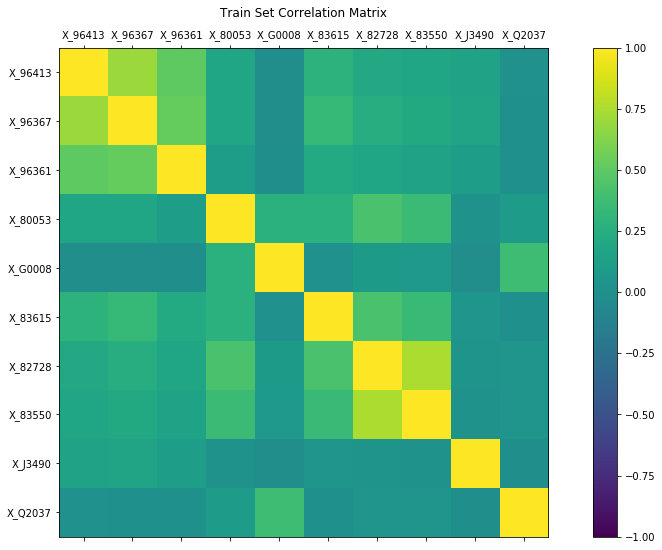

In [18]:
# Correction Matrix Plot
train_cor = train.iloc[:,4:14]
correlations = train_cor.corr()

# plot correlation matrix
plt.rcParams["figure.figsize"] = [16,9]
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,10,1)
names = [ 'X_96413',
 'X_96367',
 'X_96361',
 'X_80053',
 'X_G0008',
 'X_83615',
 'X_82728',
 'X_83550',
 'X_J3490',
 'X_Q2037']
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.title('Train Set Correlation Matrix')
plt.show()

In [19]:
train_cor.corr()

,X_96413,X_96367,X_96361,X_80053,X_G0008,X_83615,X_82728,X_83550,X_J3490,X_Q2037
X_96413,1.000000,0.702635,0.505796,0.178591,-0.010277,0.293690,0.205798,0.174456,0.153888,0.008417
X_96367,0.702635,1.000000,0.526797,0.177879,-0.010577,0.336243,0.248996,0.210993,0.169008,0.005570
X_96361,0.505796,0.526797,1.000000,0.122654,-0.006350,0.220473,0.178073,0.152074,0.114163,0.007213
X_80053,0.178591,0.177879,0.122654,1.000000,0.278854,0.277745,0.421993,0.361655,0.021069,0.104837
X_G0008,-0.010277,-0.010577,-0.006350,0.278854,1.000000,0.015061,0.091195,0.078919,-0.008094,0.378752
X_83615,0.293690,0.336243,0.220473,0.277745,0.015061,1.000000,0.422281,0.351276,0.051226,0.007645
X_82728,0.205798,0.248996,0.178073,0.421993,0.091195,0.422281,1.000000,0.750255,0.035933,0.046248
X_83550,0.174456,0.210993,0.152074,0.361655,0.078919,0.351276,0.750255,1.000000,0.026883,0.039843
X_J3490,0.153888,0.169008,0.114163,0.021069,-0.008094,0.051226,0.035933,0.026883,1.000000,-0.001814
X_Q2037,0.008417,0.005570,0.007213,0.104837,0.378752,0.007645,0.046248,0.039843,-0.001814,1.000000


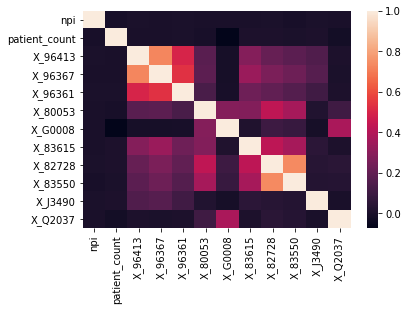

In [9]:
import seaborn as sns
sns.heatmap(train.corr())
plt.show()

# 4 Visualize Dataset
We now have a basic idea about the data. We need to extend that with some visualizations. We are going to look at two types of plots:

Univariate plots to better understand each attribute. Multivariate plots to better understand the relationships between attributes.

## 4.1 Univariate Plots
We start with some univariate plots, that is, plots of each individual variable.

It is helpful with visualization to have a way to refer to just the input attributes and just the output attributes. Let’s set that up and call the inputs attributes x and the output attribute (or class) y.

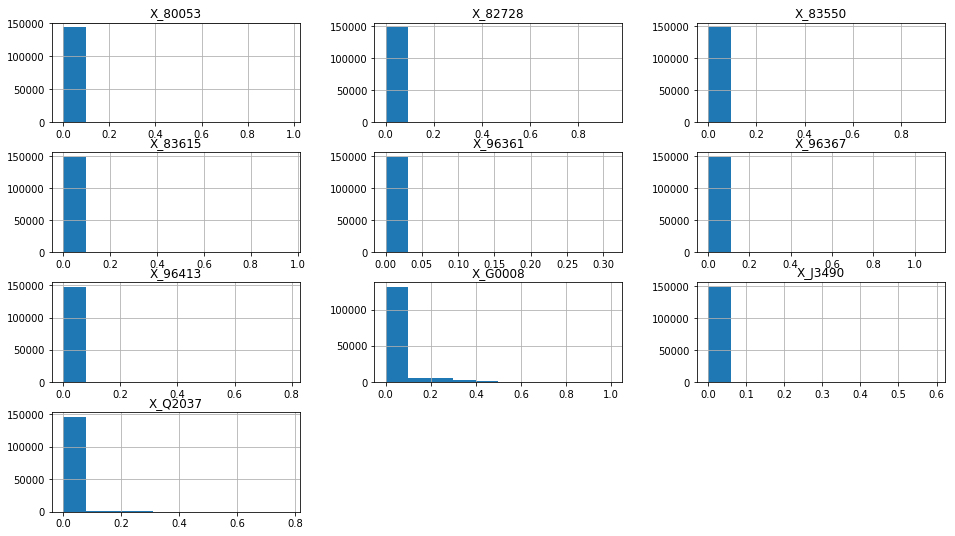

In [30]:
# histograms
plt.rcParams["figure.figsize"] = [16,9]
train_scatter.hist()
plt.title('Histograms of X Features')
plt.show()

We could also create box and whisker plots of each.

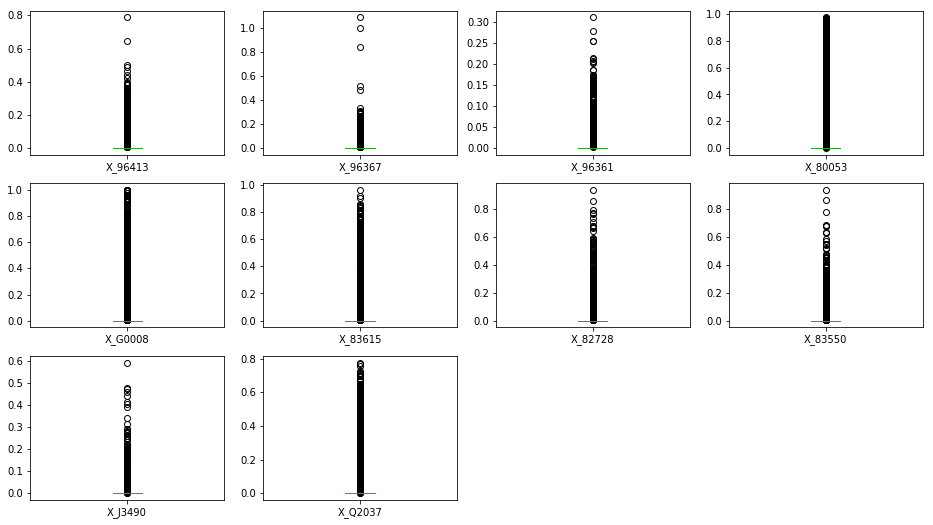

In [31]:
# box and whisker plots
train_scatter.plot(kind='box', subplots=True, layout=(3,4), sharex=False, sharey=False)
plt.title('Box Plots of X Features')
plt.show()

Both histograms and box plots give us clear idea of the distribution of the input features. Things I see from these plots:

All of X columns are distributed around 0.
Not only Y is unbalanced, X’s are also unbalanced in the binary classification. May need to try both sub-sampling the over-represented class, and over-sampling the under-represented class. Multi-class classification might be better since we could check if all the classes are unbalanced.
We can also create a barplot of the doctor type variable to get a graphical representation of the class distribution (generally uninteresting in this case because they’re even). This confirms what we learned in the last section, that the instances are not evenly distributed across the 2 classes:

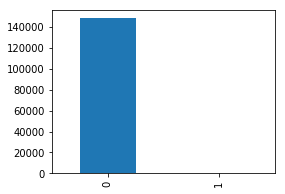

In [28]:
plt.rcParams["figure.figsize"] = [4,3]
train['Y_is_oncologist'].value_counts().plot(kind='bar')
plt.title('Histograms of Doctor Types')
plt.show()

## 4.2 Multivariate Plots
Now we can look at the interactions between the variables.

First let’s look at scatterplots of all pairs of attributes and color the points by class. In addition, because the scatterplots show that points for each class are generally separate, we can draw ellipses around them.

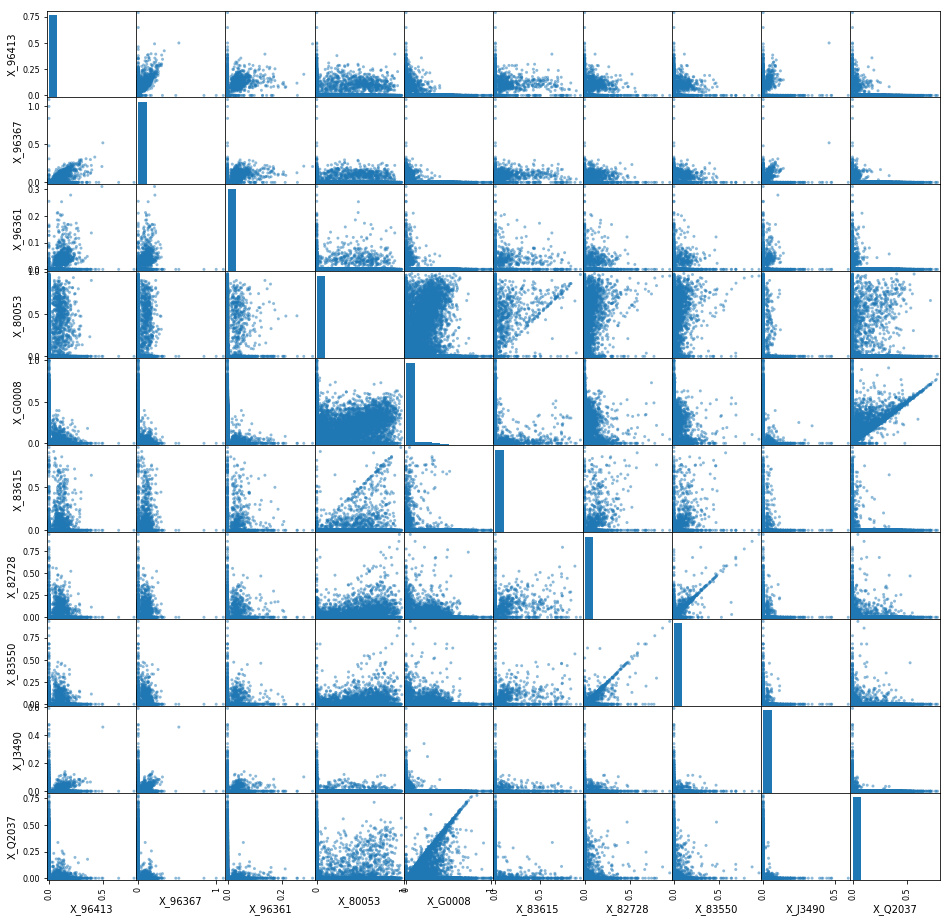

In [20]:
# Scatterplot Matrix
#from pandas.plotting import scatter_matrix
#train_scatter = train.iloc[:,np.r_[1, 4:14]]
#scatter_matrix(train_scatter, figsize = (16, 16))
#plt.show()

In [ ]:
def draw_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)
    for element in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)
    plt.xticks(xrange(11))
    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)

fig, ax = plt.subplots()
draw_plot(A, "tomato", "white")
draw_plot(B, "skyblue", "white")
plt.savefig('sample_box.png', bbox_inches='tight')
plt.close()

In [ ]:
import numpy as np; np.random.seed(1)
import matplotlib.pyplot as plt

A = train_scatter.loc[train_scatter['Y_is_oncologist']==1]
B = train_scatter.loc[train_scatter['Y_is_oncologist']==0]

#A = np.random.rand(100,10)
#B = np.random.rand(100,10)

def draw_plot(data, offset,edge_color, fill_color):
    pos = np.arange(data.shape[1])+offset 
    bp = ax.boxplot(data, positions= pos, widths=0.3, patch_artist=True, manage_xticks=False)
    for element in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)
    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)

fig, ax = plt.subplots()
draw_plot(A, -0.2, "tomato", "white")
draw_plot(B, +0.2,"skyblue", "white")
plt.xticks(xrange(10))
plt.savefig(__file__+'.png', bbox_inches='tight')
plt.show()
plt.close()

We can also look at box and whisker plots of each input variable again, but this time broken down into separate plots for each class. This can help to tease out obvious linear separations between the classes. This is useful to see if there are clearly different distributions of the attributes for each class value.

Next we can get an idea of the distribution of each attribute, again like the box, broken down by class value. Sometimes histograms are good for this, but in this case we will use some probability density plots to give nice smooth lines for each distribution.